#Intro

Tugas besar Machine Learning tahap dua. Ditulis oleh Mochammad Ivan Adhyaksa Pradana (NIM 1301184080) & Muhammad Rayhan Hakim (NIM 1301181061).

Dataset yang digunakan adalah dataset kendaraan. Pada notebook ini akan dijelaskan cara melakukan klasifikasi pada dataset terpilih, termasuk persiapan datanya (data preparation & cleansing).

#Formulasi Masalah

Tujuan dari dataset kendaraan adalah memprediksi apakah seseorang tertarik atau tidak untuk membeli kendaraan berdasarkaan beberapa atribut. Dataset ini diperoleh dari dosen Machine Learning. Klasifikasi akan dilakukan berdasarkan atribut-atribut yang tersedia.

# Eksplorasi dan Persiapan Dataset

Dataset kendaraan_train.csv memiliki 285831 records dan 12 atribut. Tipe data untuk tiap-tiap atributnya adalah sebagai berikut (sesuai dengan file readme.txt):

1. id : integer
2. Jenis_Kelamin : Pria, Wanita (Kategorikal)
3. Umur : diskrit
4. SIM : 0 : Tidak punya SIM, 1 : Punya SIM (Kategorikal)
5. Kode_Daerah : Kode area tempat tinggal pelanggan (Kategorikal)
6. Sudah_Asuransi : 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan (Kategorikal)
7. Umur_Kendaraan : Umur kendaraan (Kategorikal)
8. Kendaraan_Rusak : 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak. (Kategorikal)
9. Premi : float, continuous
10. Kanal_Penjualan : Kode kanal untuk menghubungi pelanggan (email, telpon, dll) (Kategorikal)
11. Lama_Berlangganan : continuous
12. Tertarik : 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik (Kelas, Kategorikal)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import pickle
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# import dataset test dan train
train = pd.read_csv("kendaraan_train.csv")
test = pd.read_csv("kendaraan_test.csv")

In [3]:
# output jumlah record train dataset
print(f"Jumlah record: {train.shape[0]}")

Jumlah record: 285831


In [4]:
# output jumlah record test dataset
print(f"Jumlah record: {test.shape[0]}")

Jumlah record: 47639


In [ ]:
# output data table train dataset
train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# output data table train dataset
test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


Dapat dilihat bahwa terdapat beberapa atribut kategorikal. Nantinya, nilai untuk atribut-atribut tersebut akan dikonversi menjadi angka untuk perhitungan jarak. Selain itu, akan dilakukan normalisasi pada dataset, melihat banyak atribut yang memiliki range yang besarnya berbeda.

## Missing Values

Dataset ini memiliki missing values. Detailnya dapat dilihat sebagai berikut:

In [5]:
# output jumlah missing values setiap kolom pada train dataset
train.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [6]:
# output jumlah missing values setiap kolom pada test dataset
test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Missing values akan diisi berdasarkan atributnya. Umur, premi dan lama berlangganan akan diisi dengan mean, sedangkan sisanya diisi dengan modus.

In [7]:
# mengisi missing values pada train dataset
for column in ['Jenis_Kelamin', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Kanal_Penjualan']:
    train[column].fillna(train[column].mode()[0], inplace=True)

for column in ['Umur', 'Premi', 'Lama_Berlangganan']:
    train[column].fillna(train[column].mean(), inplace=True)

In [8]:
train.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Missing values sudah diisi dengan mean dan modus sehingga tidak ada lagi record dengan missing values.

## Mengubah Nilai Kategorikal Menjadi Angka

Atribut Jenis kelamin, umur kendaraan, dan kendaraan rusak memiliki nilai kategorikal. Nilai-nilai tersebut akan diubah menjadi angka agar dapat diolah, baik saat visualisasi maupun klasifikasi.

In [9]:
# mengganti data kategorikal ke numerikal
train["Jenis_Kelamin"].replace(["Wanita", "Pria"], [0, 1], inplace=True)
train["Umur_Kendaraan"].replace(["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"], [0, 1, 2], inplace=True)
train["Kendaraan_Rusak"].replace(["Tidak", "Pernah"], [0, 1], inplace=True)

test["Jenis_Kelamin"].replace(["Wanita", "Pria"], [0, 1], inplace=True)
test["Umur_Kendaraan"].replace(["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"], [0, 1, 2], inplace=True)
test["Kendaraan_Rusak"].replace(["Tidak", "Pernah"], [0, 1], inplace=True)

In [10]:
# output data table train dataset
train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,3,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0,0
3,4,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
4,5,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0


In [11]:
# output data table train dataset
test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0


## Simple Statistics

Simple statistics untuk beberapa atribut adalah sebagai berikut.

In [ ]:
for column in train.columns:
  if column == 'Umur' or column == 'Premi' or column == 'Lama_Berlangganan':
    print(f"{column}:\nAverage = {train[column].mean()}")
    print(f"Minimum = {train[column].min()}")
    print(f"Maximum = {train[column].max()}")
    print(f"Standard Deviation = {train[column].std()}\n")

Umur:
Average = 38.8443359583531
Minimum = 20.0
Maximum = 85.0
Standard Deviation = 15.131607903306524

Premi:
Average = 30536.683472067587
Minimum = 2630.0
Maximum = 540165.0
Standard Deviation = 16712.08040490916

Lama_Berlangganan:
Average = 154.28630181835572
Minimum = 10.0
Maximum = 299.0
Standard Deviation = 81.62068358499447



## Distribution

Distribusi atribut pada dataset dapat dilihat sebagai berikut.

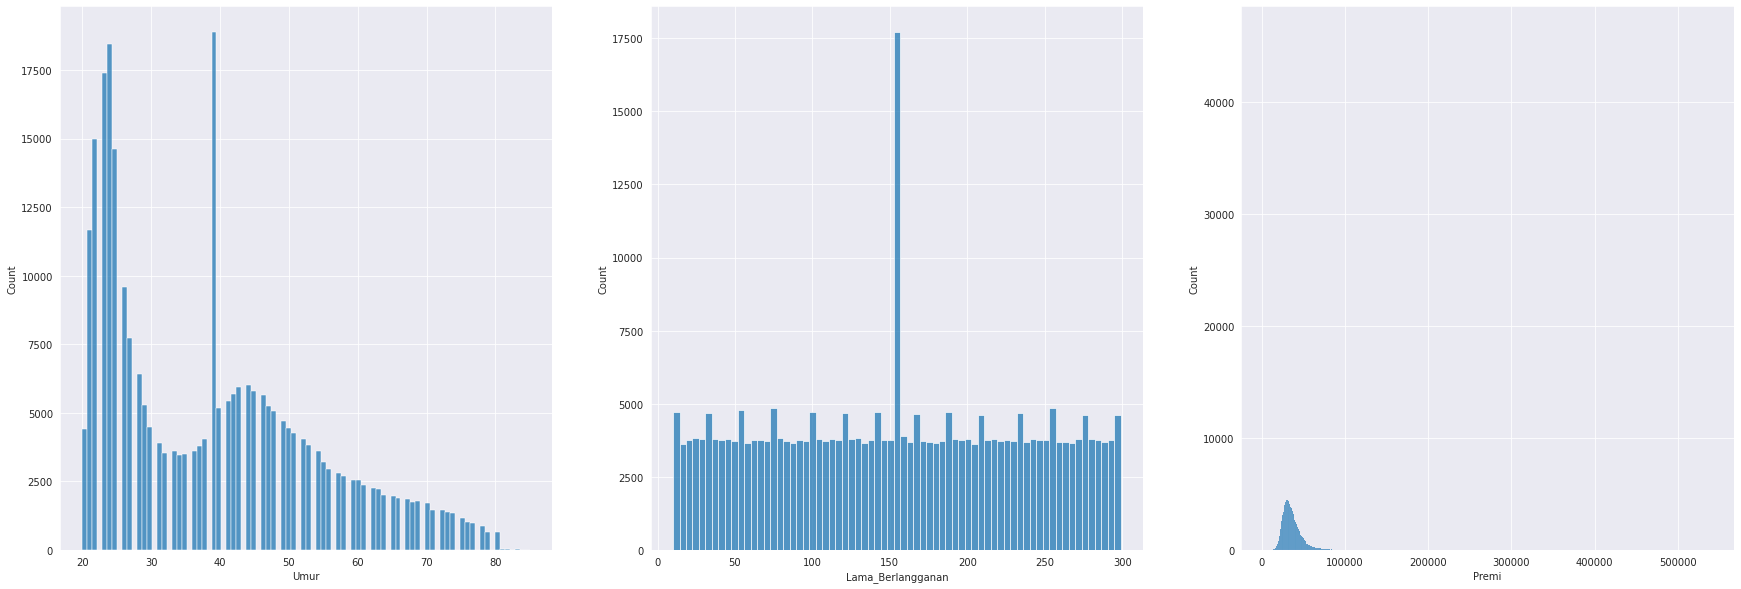

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.histplot(data=train, x='Umur', ax=axs[0])
sns.histplot(data=train, x='Lama_Berlangganan', ax=axs[1])
sns.histplot(data=train, x='Premi', ax=axs[2])
plt.show()

## Correlation

Korelasi antar atribut dataset adalah sebagai berikut.

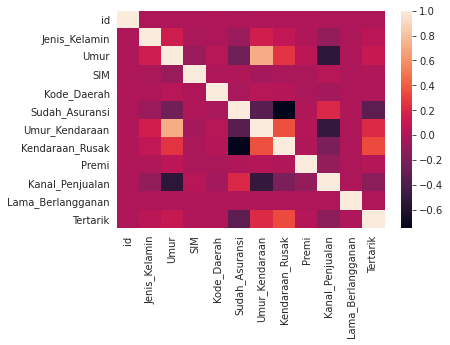

In [ ]:
correlation = train.corr()

ax = sns.heatmap(correlation,
                xticklabels=correlation.columns,
                yticklabels=correlation.columns)

Kelas Tertarik sangat berkorelasi dengan Kendaraan_Rusak. Atribut Umur_Kendaraan berada pada tempat kedua. Selain itu, atribut Sudah_Asuransi memiliki korelasi terkecil dengan kelas Tertarik.

## Outlier

Berikut boxplot untuk mengecek outlier.

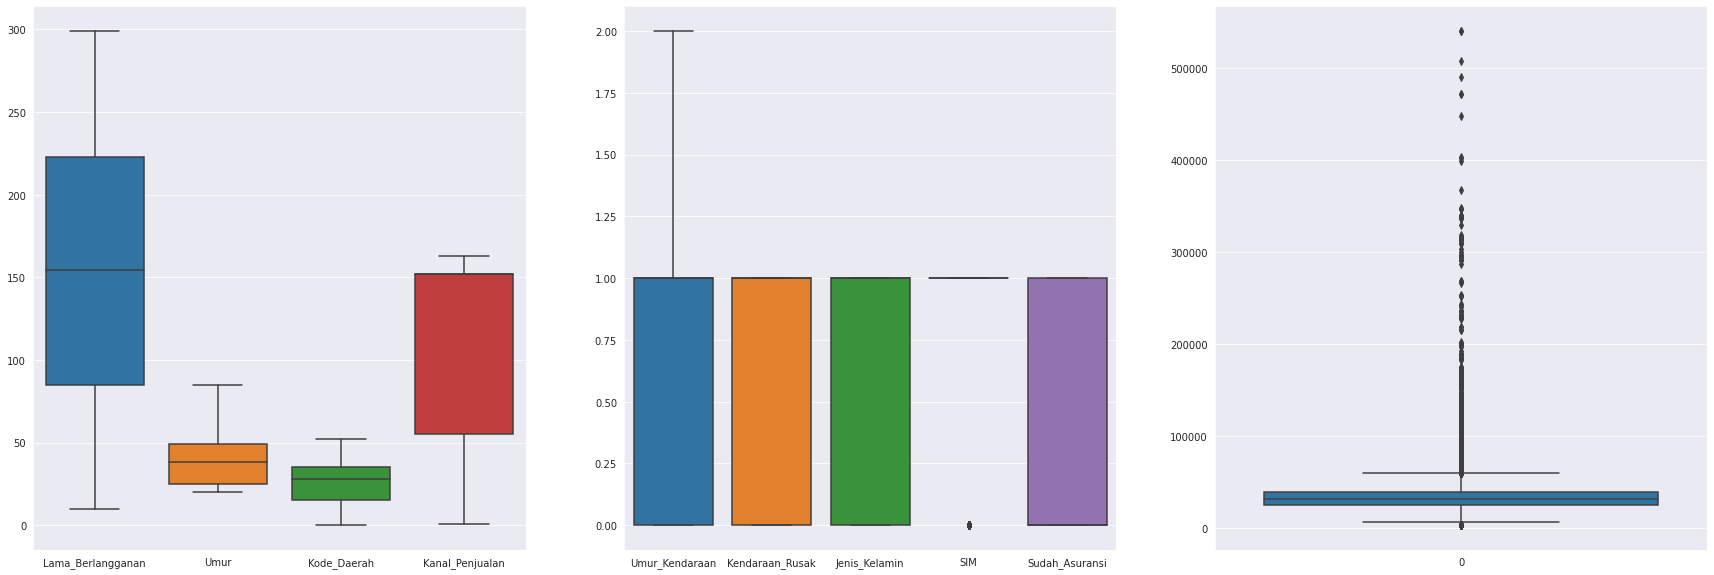

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.boxplot(data=train[["Lama_Berlangganan", "Umur", "Kode_Daerah", "Kanal_Penjualan"]], ax=axs[0])
sns.boxplot(data=train[["Umur_Kendaraan", "Kendaraan_Rusak", "Jenis_Kelamin", "SIM", "Sudah_Asuransi"]], ax=axs[1])
sns.boxplot(data=train["Premi"], ax=axs[2])
plt.show()

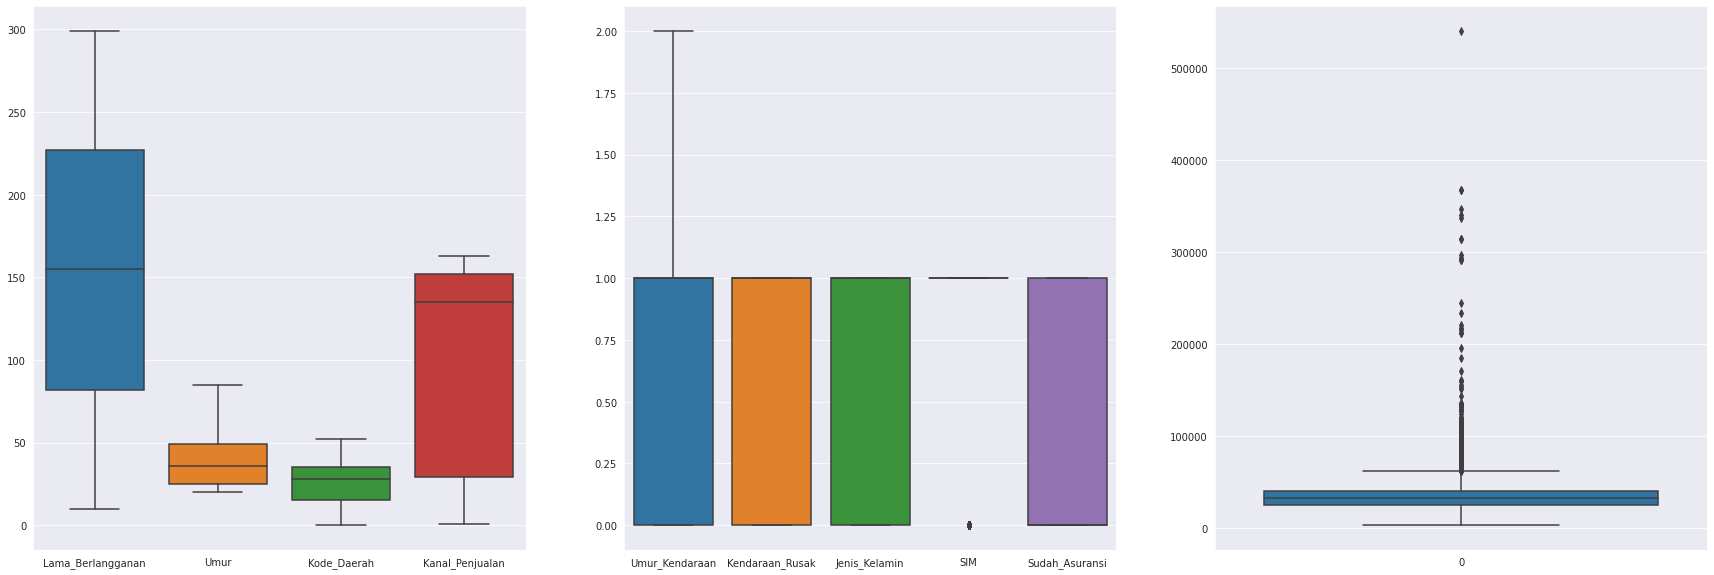

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.boxplot(data=test[["Lama_Berlangganan", "Umur", "Kode_Daerah", "Kanal_Penjualan"]], ax=axs[0])
sns.boxplot(data=test[["Umur_Kendaraan", "Kendaraan_Rusak", "Jenis_Kelamin", "SIM", "Sudah_Asuransi"]], ax=axs[1])
sns.boxplot(data=test["Premi"], ax=axs[2])
plt.show()

## Duplicates

Dataset train tidak memiliki duplicate record, sedangkan test memiliki 3 duplicate.

In [12]:
# output jumlah data duplikat pada dataset train
train.duplicated().sum()

0

In [13]:
# output jumlah data duplikat pada dataset test
test.duplicated().sum()

3

## Model

Untuk pembuatan model, digunakan sebuah pipeline untuk mengotomasisasi proses scaling, feature selection dan model KNN, pipeline juga digunakan untuk menghindari data leakage. Model ini akan di test menggunakan 30% data dari dataset train sebagai validate dataset.

### Scaling

Scaling akan menggunakan Min - Max Scaling

### Feature Selection

Feature selection akan menggunakan Select K Best

### Classification

K Nearest Neighbor akan digunakan sebagai model klasifikasi

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [18]:
# membuang id karena tidak diperlukan, dan tertarik sebagai label target
x = train.drop(["id", "Tertarik"], axis=1)
y = train["Tertarik"].values

# split data train 70% dan data validate 30%
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

In [19]:
# membuat pipeline untuk membuat model
pipeline = make_pipeline(MinMaxScaler(), SelectKBest(), KNeighborsClassifier(n_jobs=-1), verbose=True)
pipeline.fit(x_train, y_train)

[Pipeline] ...... (step 1 of 3) Processing minmaxscaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing selectkbest, total=   0.0s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=  28.2s


Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selectkbest',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x7f5568d33ef0>)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=True)

In [20]:
# list feature yang terpilih
x.columns[pipeline.named_steps['selectkbest'].get_support()]

Index(['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan'],
      dtype='object')

In [21]:
# output hasil dari klasifikasi
y_predict = pipeline.predict(x_val)
print(f'{classification_report(y_val, y_predict)}')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     75404
           1       0.33      0.17      0.23     10346

    accuracy                           0.86     85750
   macro avg       0.61      0.56      0.58     85750
weighted avg       0.83      0.86      0.84     85750



### Testing
Testing model yang telah dibangun

In [22]:
# testing model dengan dataset test
x_test = test.drop(["Tertarik"], axis=1)
y_test = test["Tertarik"].values

y_pred = pipeline.predict(x_test)

In [23]:
# output hasil testing model
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     41778
           1       0.34      0.17      0.23      5861

    accuracy                           0.86     47639
   macro avg       0.62      0.56      0.58     47639
weighted avg       0.82      0.86      0.84     47639



## Eksperiment

Eksperimen kami melakukan hypertuning parameter menggunakan k-fold cross validation

### Hypertuning Parameter

Hypertuning parameter akan menggunakan k-fold cross validation dengan k = 5. Parameter yang akan di test sebagai berikut:
- jumlah k untuk select k best: 4, 5, 6, 7, 8, 9, 10
- jumlah n untuk k nearest neighbor: 3, 4, 5, 6, 7, 8, 9, 10
- parameter weight untuk k nearest neighbor: uniform, distance
- nilai p untuk untuk distance metric: 1, 2

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# membuang tertarik sebagai label target
x_test = test.drop(["Tertarik"], axis=1)
y_test = test["Tertarik"].values

In [ ]:
# buat pipeline dan parameter untuk cross validation
pipe = make_pipeline(MinMaxScaler(), SelectKBest(), KNeighborsClassifier(n_jobs=-1), verbose=True)
params = {
    'selectkbest__k': [4, 5, 6, 7, 8, 9, 10],
    'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

In [ ]:
# cross validation dengan Grid Search
gs = GridSearchCV(pipe, params, n_jobs=-1, cv=5, verbose=True)
gs.fit(x_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[Pipeline] ...... (step 1 of 3) Processing minmaxscaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing selectkbest, total=   0.0s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=  32.6s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_jobs=-1))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                               9, 10],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance'],
                         'selectkbest__k': [4, 5, 6, 7, 8, 9, 10]},
             verbose=True)

In [ ]:
# output best parameter
gs.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('selectkbest', SelectKBest(k=4)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=10, p=1))],
         verbose=True)

In [ ]:
# list selected feature
x.columns[gs.best_estimator_.named_steps['selectkbest'].get_support()]

Index(['Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak',
       'Kanal_Penjualan'],
      dtype='object')

In [ ]:
# output hasil dari klasifikasi
y_pred = gs.predict(x_test)
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     41776
           1       0.42      0.03      0.06      5860

    accuracy                           0.88     47636
   macro avg       0.65      0.51      0.50     47636
weighted avg       0.82      0.88      0.83     47636



In [ ]:
# save first model & hypertuned model
# pickle.dump(pipeline, open('model_1.sav', 'wb'))
# pickle.dump(gs, open('model_hypertuned.sav', 'wb'))

In [ ]:
# try saved model
# best_model = pickle.load(open('model_hypertuned.sav', 'rb'))
# y_best_model = best_model.predict(x_test)
# print(f'{classification_report(y_test, y_best_model)}')

# Kesimpulan
Dari penjelasan di atas, dapat disimpulkan bahwa model KNN yang dibangun sudah cukup berkualitas. Akurasi yang didapat saat training dan saat testing sangat mirip, yaitu 85% dan 86%. Artinya, model yang dibangun tidak mengalami overfit.

Untuk meningkatkan akurasi model lebih jauh, dapat dilakukan hypertuning parameter saat membuat pipeline. Dengan hypertuning, akurasi yang didapat meningkat sebesar 2%, menjadi 88%. Parameter yang ditune meliputi jumlah fitur dan jenis fitur yang dipilih.

In [14]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [24]:
train.to_csv('/drive/My Drive/openme/kendaraan_train_olahan2.csv')

In [25]:
test.to_csv('/drive/My Drive/openme/kendaraan_test_olahan2.csv')